In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

# Decision tree / random forest classification of penguins with sklearn

# This is an exploration of the Palmer Station penguins dataset 
# https://allisonhorst.github.io/palmerpenguins/
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.
# https://en.wikipedia.org/wiki/Pygoscelis

# Three hundred brush-tailed penguins were briefly captured
# and subjected to humiliating beak, flipper, and weight measurements 
# so that data science students don't have to look at Ronald Fisher's 
# iris dataset.

In [3]:
# There is a mirror of this dataset in vega-datasets.
# see if I'm allowed to download it by curl...
# curl https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json
# !curl -OL https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json 

In [4]:
# Check that the download was data and not a webpage with an error...
# !head penguins.json

In [5]:
penguins = pd.read_json("penguins.json")

In [6]:
# Read in the two sets once they are fixed an in a file:
penguins_train=pd.read_csv( "penguins_train.csv")
penguins_test = pd.read_csv( "penguins_test.csv")
penguins = penguins_train


In [7]:
# How many penguins?
penguins.Species.value_counts(), len(penguins)

(Adelie       117
 Gentoo        92
 Chinstrap     48
 Name: Species, dtype: int64,
 257)

In [9]:
# Dictionary for painting the dots high-contrast colors
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap": "red"}

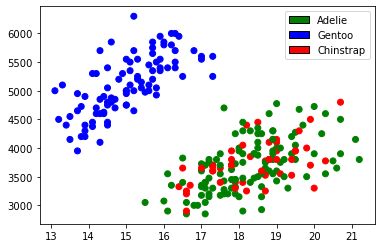

In [10]:
plt.scatter(penguins["Beak Depth (mm)"], penguins["Body Mass (g)"] , color = penguins.Species.map(colors)  )
# Had to look up how to make a legend for this kind of data
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]
plt.legend(handles=legend_elements)

<AxesSubplot:xlabel='Beak Depth (mm)', ylabel='Body Mass (g)'>

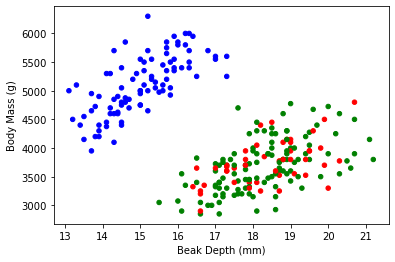

In [11]:
penguins.plot( "Beak Depth (mm)", "Body Mass (g)" , kind="scatter", color = penguins.Species.map(colors)  )

In [12]:
# Since I have to clean.. and I have to clean training and test,
# put all the essential cleaning in a funciton and call it three times.

def penguincleanit(data):
    data["SP1"] = data.Species == "Adelie"
    data["SP2"] = data.Species == "Gentoo"
    data["SP3"] = data.Species == "Chinstrap"
    # construct a class label... Adelie, Gentoo, Chinstrap. 
    # Alphabetical order would probably be a better choice.  WHY? 
    data["LABEL"] = data["SP2"] + 2 * data["SP3"]  
    # I don't know how I'm going to keep Depth / mass / flipper /length straight.
    return data[np.isfinite( data["Beak Depth (mm)"]) & 
                        np.isfinite( data["Body Mass (g)"]) &
                        np.isfinite( data["Flipper Length (mm)"]) & 
                        np.isfinite( data["Beak Length (mm)"])] 
                   
penguinclean = penguincleanit(penguins)
penguins_test = penguincleanit(penguins_test)
penguins_train = penguincleanit(penguins_train)

In [13]:
penguinclean.LABEL.value_counts()


0    116
1     91
2     48
Name: LABEL, dtype: int64

In [15]:
penguins["SP1"].sum(), penguins["SP2"].sum(), penguins["SP3"].sum()

(117, 92, 48)

In [16]:
len(penguins)

257

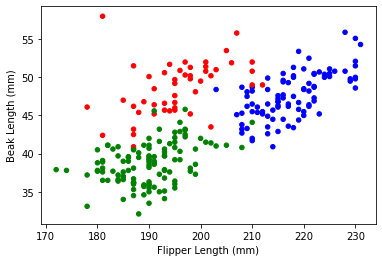

In [17]:
penguins[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)", "Beak Length (mm)", kind="scatter", color = penguins.Species.map(colors))
plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [20]:

X = penguins_train[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
Y = penguins_train[["SP1", "SP2", "SP3"]]
XTEST = penguins_test[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
YTEST = penguins_test["LABEL"]

In [21]:
clf = DecisionTreeClassifier()
clf.fit(X,Y)

DecisionTreeClassifier()

In [22]:
YPRED_onehot = clf.predict(XTEST)
YPRED = np.argmax(YPRED_onehot,axis=1)

In [24]:
YPRED_onehot[0:10]

array([[False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False]])

In [25]:
YPRED[0:10]

array([1, 1, 1, 2, 0, 1, 0, 1, 2, 0])

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
c = confusion_matrix(YPRED, YTEST)

In [28]:
c

array([[34,  0,  0],
       [ 0, 32,  0],
       [ 1,  0, 20]])

[Text(217.62000000000003, 199.32, 'X[3] <= 206.5\ngini = 0.42\nsamples = 255\nvalue = [[139, 116]\n[164, 91]\n[207, 48]]'),
 Text(150.66000000000003, 163.07999999999998, 'X[2] <= 43.35\ngini = 0.27\nsamples = 158\nvalue = [[44, 114]\n[157, 1]\n[115, 43]]'),
 Text(83.70000000000002, 126.83999999999999, 'X[2] <= 42.3\ngini = 0.045\nsamples = 115\nvalue = [[4, 111]\n[115, 0]\n[111, 4]]'),
 Text(50.220000000000006, 90.6, 'X[0] <= 16.7\ngini = 0.012\nsamples = 106\nvalue = [[1, 105]\n[106, 0]\n[105, 1]]'),
 Text(33.480000000000004, 54.359999999999985, 'X[2] <= 39.5\ngini = 0.12\nsamples = 10\nvalue = [[1, 9]\n[10, 0]\n[9, 1]]'),
 Text(16.740000000000002, 18.119999999999976, 'gini = 0.0\nsamples = 9\nvalue = [[0, 9]\n[9, 0]\n[9, 0]]'),
 Text(50.220000000000006, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]\n[0, 1]]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 96\nvalue = [[0, 96]\n[96, 0]\n[96, 0]]'),
 Text(117.18, 90.6, 'X[3] <= 189.5\ngini 

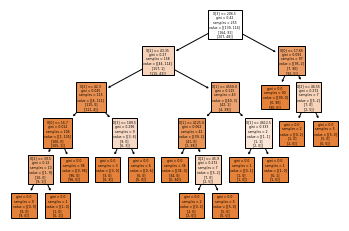

In [29]:
plot_tree(clf, filled=True)

In [58]:
plot_tree?

Signature:
plot_tree(
    decision_tree,
    *,
    max_depth=None,
    feature_names=None,
    class_names=None,
    label='all',
    filled=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rotate='deprecated',
    rounded=False,
    precision=3,
    ax=None,
    fontsize=None,
)
Docstring:
Plot a decision tree.

The sample counts that are shown are weighted with any sample_weights that
might be present.

The visualization is fit automatically to the size of the axis.
Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
the size of the rendering.

Read more in the :ref:`User Guide <tree>`.

.. versionadded:: 0.21

Parameters
----------
decision_tree : decision tree regressor or classifier
    The decision tree to be plotted.

max_depth : int, optional (default=None)
    The maximum depth of the representation. If None, the tree is fully
    generated.

feature_names : list of strings, optional (default=None)
    Names of each of the features.



In [83]:
# sklearn documentation offers a prettier
if 0:
    import graphviz 
    dot_data = tree.export_graphviz(clf, out_file=None) 
    graph = graphviz.Source(dot_data) 
    graph.render("penguins-tree") 

In [30]:
firstsplit = np.array([[139, 116],[164, 91],[207, 48]])

In [31]:
splits = firstsplit / np.sum(firstsplit,axis=1)[:,np.newaxis]
splits

array([[0.54509804, 0.45490196],
       [0.64313725, 0.35686275],
       [0.81176471, 0.18823529]])

In [33]:
splits = firstsplit / np.sum(firstsplit,axis=0)[np.newaxis,:]
splits

array([[0.27254902, 0.45490196],
       [0.32156863, 0.35686275],
       [0.40588235, 0.18823529]])

In [34]:
splits**2


array([[0.07428297, 0.20693579],
       [0.10340638, 0.12735102],
       [0.16474048, 0.03543253]])

In [35]:
np.sum(splits**2, axis=0)

array([0.34242983, 0.36971934])

In [36]:
mean0 = penguins_train["Beak Depth (mm)"].mean()
mean1 = penguins_train["Body Mass (g)"].mean() 
mean2 = penguins_train['Beak Length (mm)'].mean()
mean3 = penguins_train["Flipper Length (mm)"].mean()

In [37]:
xgrid = np.arange(170, 230,2) # range for flipper length
ygrid = np.arange(30,59,1)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([mean0, mean1, ygrid[j], xgrid[i]])
       # print(x)
        call = np.argmax(clf.predict(x[np.newaxis,:]), axis=1)
        z[i,j]= call

(30, 29) (30, 29) (30, 29)


Text(0, 0.5, 'Flipper Length (mm)')

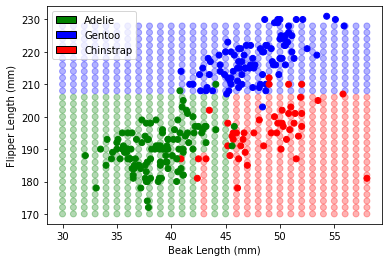

In [38]:
colorsnum = { 0 : "green", 1: "blue", 2:"red"} 
c = [colorsnum[i] for i in z.reshape(-1)]
plt.scatter(yax,xax, color=c, alpha=0.3)

plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.xlabel("Beak Length (mm)")
plt.ylabel( "Flipper Length (mm)")

In [39]:
from sklearn.ensemble import RandomForestClassifier
# Random forest by default constructs 100 classifiers (they are 
# cheap to run, so why not?) but there is less to see here.

In [40]:
clfforest = RandomForestClassifier()
clfforest.fit(X,Y)

RandomForestClassifier()

In [41]:
dir(clfforest)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'estimator_params',
 'estimators_',
 'feature_

In [42]:
YPREDf_onehot = clfforest.predict(XTEST)
YPREDf = np.argmax(YPREDf_onehot,axis=1)

In [43]:
cforest = confusion_matrix(YPREDf, YTEST)
cforest

array([[34,  0,  0],
       [ 0, 32,  0],
       [ 1,  0, 20]])

In [44]:
xgrid = np.arange(170, 230,2) # range for flipper length
ygrid = np.arange(30,59,1)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z2 = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([mean0, mean1, ygrid[j], xgrid[i]])
       # print(x)
        call = np.argmax(clfforest.predict(x[np.newaxis,:]), axis=1)
        z2[i,j]= call

(30, 29) (30, 29) (30, 29)


Text(0, 0.5, 'Flipper Length (mm)')

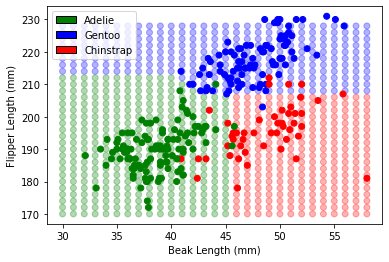

In [45]:
colorsnum = { 0 : "green", 1: "blue", 2:"red"} 
c = [colorsnum[i] for i in z2.reshape(-1)]
plt.scatter(yax,xax, color=c, alpha=0.3)

plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.xlabel("Beak Length (mm)")
plt.ylabel( "Flipper Length (mm)")